In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns


url = 'https://github.com/Nemo-sop/DataSets/blob/main/Ranked%20Games%20AoE2.csv?raw=true'
df = pd.read_csv(url,index_col=0, encoding = "ISO-8859-1")

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

GRAFICOS SEABORN

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Densidad')

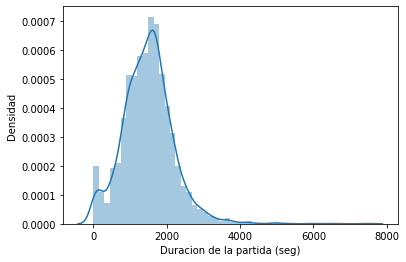

In [4]:
# visualizacion de las duraciones de las partidas
# Operacion auxiliar para pasar de hh:mm:ss a segundos

df_procesado = df['duration'].str.split(':').apply(lambda x: int(x[0]) * 3600 + int(x[1]) * 60 + int(x[2]))

p = sns.distplot(df_procesado.head(3000))
# Agregamos el .head(3000) ya que hay datos fuera de escala que no nos permiten visualizar los datos corectamente
df_procesado.max()

p.set_xlabel("Duracion de la partida (seg)", fontsize = 10)
p.set_ylabel("Densidad", fontsize = 10)

Como podemos observar en el grafico la gran mayoria de las partidas tiende a durar 2000 segundos o menos (alrededor de 33 min), hay algunas partidas muy fuera de lo comun que duran horas y no son representativas de los datos. Se las atribuimos a errores de registro, experimentaciones o intentos de romper records.

Text(0, 0.5, 'Rating')

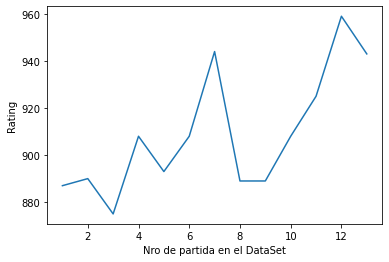

In [5]:
# visualizacion del rating de un jugador

jugador = "Plopi"

ganadas = df[df["name.win"] == jugador]
rating_ganadas = ganadas["rating.win"]

perdidas = df[df["name.lose"] == jugador]
rating_perdidas = perdidas["rating.lose"]

rating = pd.concat([rating_ganadas, rating_perdidas]).to_frame(name = "vals")
rating.insert(0, 'Index', range(1, 1 + len(rating)))

p = sns.lineplot(data=rating,x="Index", y="vals")
#rating
p.set_xlabel("Nro de partida en el DataSet", fontsize = 10)
p.set_ylabel("Rating", fontsize = 10)

En este grafico podemos ver el rating de cualquier jugador teniendo en cuenta las partidas registradas en el dataset y como fue variando en funcion de las victorias y derrotas que tuvo

Text(0, 0.5, 'Paises')

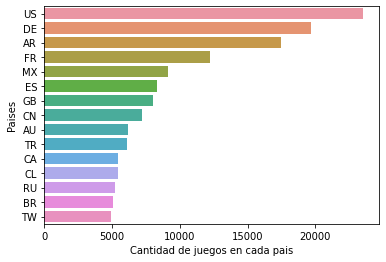

In [7]:
# visuaizacion de la cantidad de juegos de cada pais (los 15 paises con valores mas altos)
ganadores =  df["country.win"]
perdedores = df["country.lose"]

paises = pd.concat([ganadores,perdedores],axis=0)
dfPaises = paises.value_counts().head(15).to_frame(name="vals")
dfPaises
p = sns.barplot(x='vals', y = dfPaises.index, data=dfPaises)
p.set_xlabel("Cantidad de juegos en cada pais", fontsize = 10)
p.set_ylabel("Paises", fontsize = 10)

Este grafico contamos la cantidad de juegos que tuvieron personas ubicadas dentro de cada paise, por cuestiones esteticas solo mostramos los primeros 15 ya que contienen ademas la mayoria de dato

GRAFICOS MATPLOTLIB

Text(0.5, 1.05, 'civilizaciones mas utilizadas')

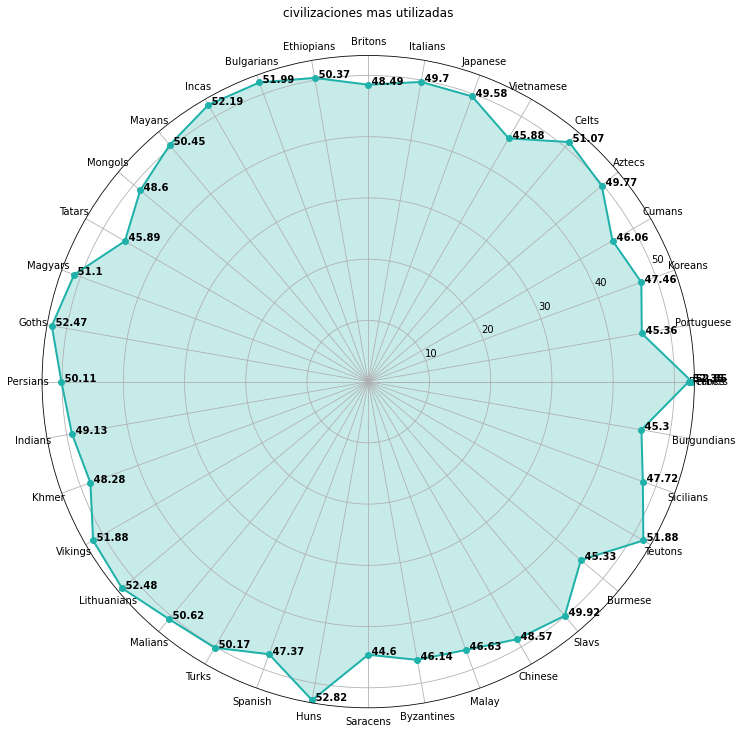

In [8]:
#grafico 1
#porcentaje de victorias por cada civilizacion

winners =  df["civ.win.name"]
lossers = df["civ.lose.name"]
civilizations = list(pd.concat([winners,lossers],axis=0).unique())
winratio = np.zeros(len(civilizations))

#obteneemos el porcentaje de voctorias de cada civilizacion
for i,civilizacion in enumerate(civilizations):
  wins  = df[df["civ.win.name"] == civilizacion].shape[0]
  loses = df[df["civ.lose.name"] == civilizacion].shape[0]
  winratio[i] = round(wins/(wins+loses)*100,2)

#donde se va a poner cada etiqueta
angulos = np.linspace(start=0, stop=2*np.pi, num=len(civilizations))



plt.figure(figsize=(12,12))
plt.subplot(polar=True)
#para dibujar esos puntos en los vertices
plt.plot(angulos, winratio, 'o-',color="lightseagreen", linewidth=2)
#para pintar el area
plt.fill(angulos, winratio, color="lightseagreen",alpha=0.25)
#para escribir el numero
for i, v in enumerate(winratio):
    plt.text(angulos[i], winratio[i], " "+str(v), fontweight='bold')
lines, labels = plt.thetagrids(np.degrees(angulos), labels=civilizations)
plt.title('civilizaciones mas utilizadas')

En este grafuco podemos ver de una manera mucho mas visual lo que habiamos corroborado en la entrega pasada, que todas las civilizaciones estan balanceadas en el sentido de que su porcentaje de victorias es parejo


*   siendo los Franks los que mas ganaron con el 52.85%
*   siendo los Saracens los que menos ganaron con el 44.6% 



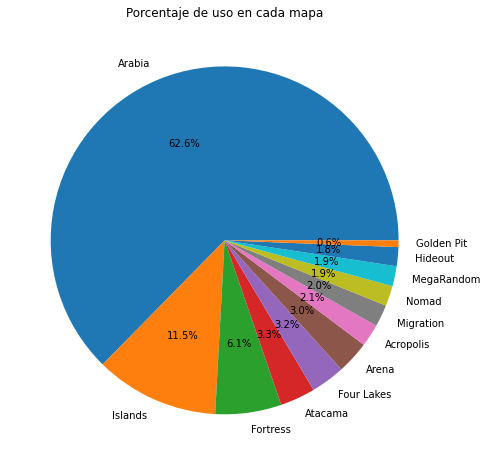

In [ ]:
#grafico 2

#mapas mas usados
maps = df["map_type.name"].unique()
#usos de cada mapa
uses = df["map_type.name"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(uses, labels = maps, autopct = "%0.1f%%")
plt.title("Porcentaje de uso en cada mapa")
plt.show()

En este grafico de torta podemos ver cuales son los mapas mas usados en % lo que nos muestra una clarisima preferencia d elos jugadores por Arabia, en menor medida las islas y la fortaleza y ya el resto de mapas tienen un uso muy inferior.

Cabe destacar que la gran diferencia de Arabia sobre el resto se debe a que es el mapa predilecto de los jugadores que juegan ak juego de manera competitiva

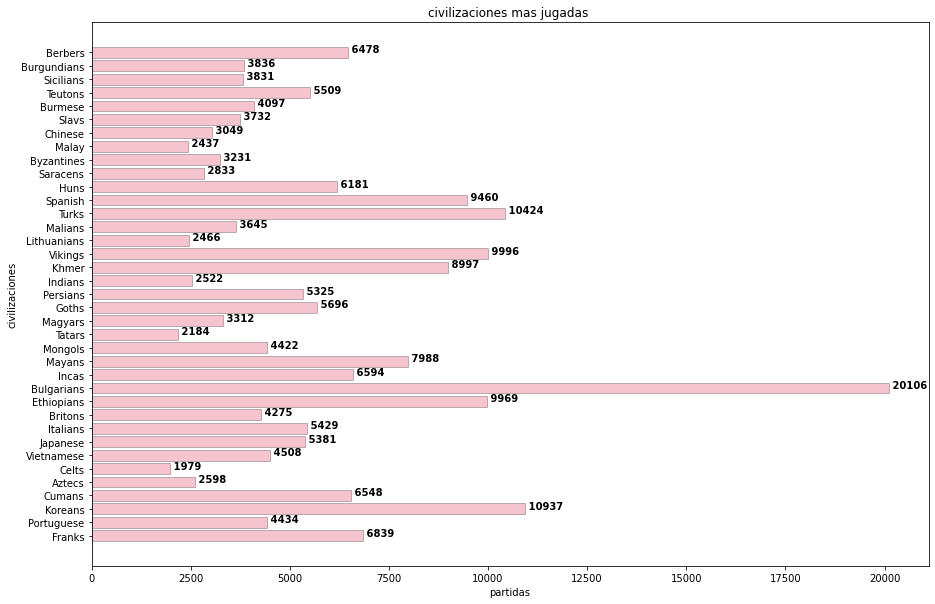

In [9]:
#civilizaciones mas jugadas, independientemente de si ganaron o perdieron


#obtener todas las civilizaciones jugadas
winners =  df["civ.win.name"]
lossers = df["civ.lose.name"]
civilizations = list(pd.concat([winners,lossers],axis=0).unique())

#obtener cuantas veces se uso cada civilizacion
wins =winners.value_counts()
lost = lossers.value_counts()
played = wins + lost

fig , ax= plt.subplots(figsize=(15, 10))
plt.barh(civilizations, played,color="crimson",alpha=0.25,edgecolor = "black")

#escribir cuantas veces se utilizo cada civilizacion al costado de cada barra
for i, v in enumerate(played):
    ax.text(v, i, " "+str(v), fontweight='bold')

plt.xlabel("partidas")
plt.ylabel("civilizaciones")
plt.title("civilizaciones mas jugadas ")
plt.show()

Por ultimo en este grafico podemos apreciar cuales son las civilizaciones mas escogidas por los jugadores.Es muy interesante ver que poe mas que los Franks son la civilizacion con mas porcentaje de victorias estos no son muy escogidos,
posiblemente por la dificultad de usarlos.
Caso contrarrio pasa con los Ethipians que si bien no tienen un porcentaje de victorias malo del 50.37% su uso mucho mayor que el resto, casi doblando al segundo en la lista, esto posiblemente se deba a que es una civilizacion facil de utilizar